# Hypothesis testing

The [MPG Dataset](https://www.kaggle.com/datasets/toramky/automobile-dataset) can be downloaded from kaggle.

## Motivation for two sample tests

* Show the t test with plots of the samples
* Show an example from nature
* Show how t test does not perform the best
* Show the problems with the different tests (with choosing)

Exercises:
* Plot datasets
* Comment for differences
* Two sample t test (point to resource to find the test)
* How t test fails and introduce other tests
* Then show simulations

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, norm, rankdata, wilcoxon, cauchy
from scipy.stats import ttest_ind

import ipywidgets as widgets
from ipywidgets import interact
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('./Automobile_data.xls')
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [61]:
# print(dataset.info())  # Data types and non-null counts
print(dataset.describe())  # Statistical summary for numeric columns
print(dataset.describe(include='object'))  # Summary for categorical columns

        symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  \
count   205.000000   205.000000         205.000000  205.000000   205.000000   
mean   2555.565854   126.907317          10.142537   25.219512    30.751220   
std     520.680204    41.642693           3.972040    6.542142     6.886443   
min    1488.000000    61.000000           7.000000   13.000000

In [60]:
print(dataset.isnull().sum())  # Count of missing values per column

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64


In [62]:
print(dataset.duplicated().sum())  # Count of duplicate rows

0


In [3]:
auto = dataset

In [8]:
import seaborn.objects as so

For our tests: Null Hypothesis -> The difference between the means of both samples is zero.

# TODO: show histograms here

Length of wt_gas: 185
Length of wt_diesel: 20
P-value for t test: 0.010474457049480208
P-value for Mann-Whitneyu test: 0.005151796568976495


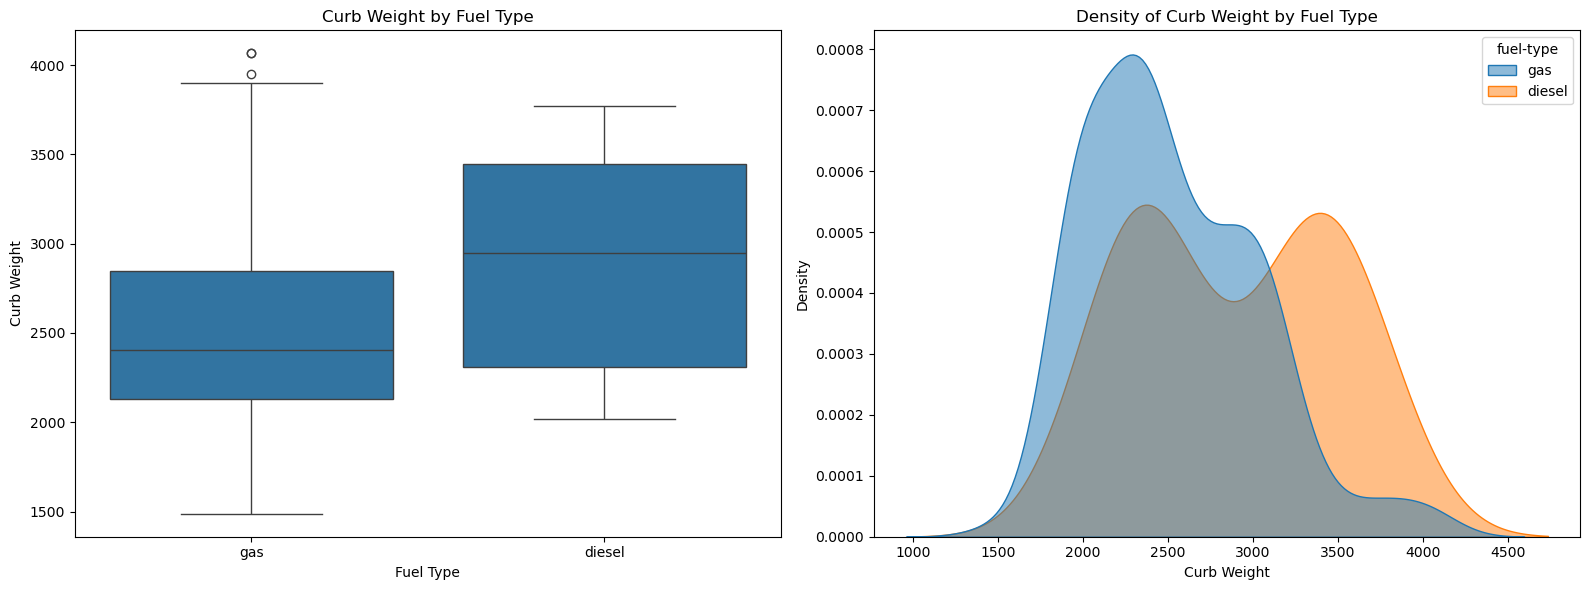

Length of price_gas: 185
Length of price_diesel: 20
P-value for t-test: 0.12417619996417702
P-value for Mann-Whitneyu test: 0.0409798974040777


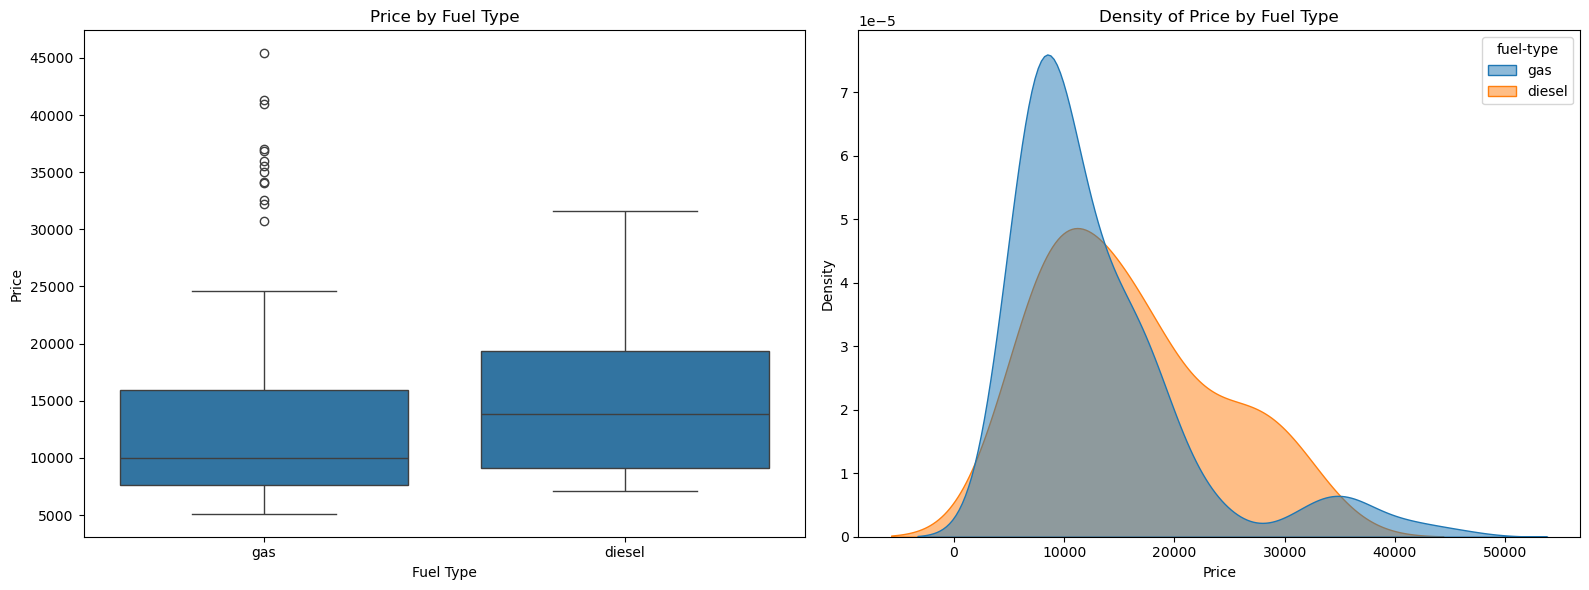

In [53]:
wt_gas = auto.loc[auto['fuel-type'] == 'gas', 'curb-weight']
wt_diesel = auto.loc[auto['fuel-type'] == 'diesel', 'curb-weight']

# Boxplot: Curb Weight vs Fuel Type
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

print(f"Length of wt_gas: {len(wt_gas)}")
print(f"Length of wt_diesel: {len(wt_diesel)}")
print("P-value for t test:", ttest_ind(wt_gas.dropna().values, wt_diesel.dropna().values, equal_var=False).pvalue)
print("P-value for Mann-Whitneyu test:", mannwhitneyu(wt_gas.dropna().values, wt_diesel.dropna().values).pvalue)
# Boxplot for Curb Weight vs Fuel Type
sns.boxplot(ax=axes[0], x='fuel-type', y='curb-weight', data=auto)
axes[0].set_title("Curb Weight by Fuel Type")
axes[0].set_xlabel("Fuel Type")
axes[0].set_ylabel("Curb Weight")

# Density plot for Curb Weight
sns.kdeplot(ax=axes[1], data=auto, x='curb-weight', hue='fuel-type', fill=True, alpha=0.5, legend=True, common_norm=False)
axes[1].set_title("Density of Curb Weight by Fuel Type")
axes[1].set_xlabel("Curb Weight")
axes[1].set_ylabel("Density")

plt.tight_layout()
plt.show()


# Convert `price` column to numeric (handling non-numeric values if needed)
auto['price'] = pd.to_numeric(auto['price'], errors='coerce')

# Filter data by fuel type for price
price_gas = auto.loc[auto['fuel-type'] == 'gas', 'price']
price_diesel = auto.loc[auto['fuel-type'] == 'diesel', 'price']

print(f"Length of price_gas: {len(price_gas)}")
print(f"Length of price_diesel: {len(price_diesel)}")
print("P-value for t-test:", ttest_ind(price_gas.dropna().values, price_diesel.dropna().values, equal_var=False).pvalue)
print("P-value for Mann-Whitneyu test:", mannwhitneyu(price_gas.dropna().values, price_diesel.dropna().values).pvalue)
# Boxplot: Price vs Fuel Type
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for Price vs Fuel Type
sns.boxplot(ax=axes[0], x='fuel-type', y='price', data=auto)
axes[0].set_title("Price by Fuel Type")
axes[0].set_xlabel("Fuel Type")
axes[0].set_ylabel("Price")

# Density plot for Price
sns.kdeplot(ax=axes[1], data=auto, x='price', hue='fuel-type', fill=True, alpha=0.5, legend=True, common_norm=False)
axes[1].set_title("Density of Price by Fuel Type")
axes[1].set_xlabel("Price")
axes[1].set_ylabel("Density")

plt.tight_layout()
plt.show()


In [15]:
# do a qq plot as well above, also a histogram with different bin sizes/ n_bins

We will now look at some simulation results and see how the other tests perform compared to the t-test

## Implementation of the different tests

TODO: take these implementations to a different file and then import it

### Wilcoxon impl

In [14]:
from hypo_tests import mannwhitneyu

np.random.seed(0)
sample1 = np.random.normal(loc=50, scale=10, size=300)
sample2 = np.random.normal(loc=60, scale=20, size=300)

mannwhitneyu(sample1, sample2, alternative='two-sided')

MannwhitneyuResult(statistic=32960.0, pvalue=1.4217284932393384e-08)

In [15]:
from hypo_tests import van_der_waerden_test

np.random.seed(0)
sample1 = np.random.normal(loc=50, scale=10, size=300)
sample2 = np.random.normal(loc=60, scale=20, size=300)
statistic, p_value = van_der_waerden_test(sample1, sample2)
print("van_der_waerden_test")
print(f"Test Statistic: {statistic}")
print(f"P-Value: {p_value}")


van_der_waerden_test
Test Statistic: 26.299182518063674
P-Value: 2.9241242149868896e-07


In [16]:
from hypo_tests import median_test

np.random.seed(0)
sample1 = np.random.normal(loc=50, scale=10, size=300)
sample2 = np.random.normal(loc=60, scale=20, size=300)

statistic, p_value = median_test(sample1, sample2)
print(f"Test Statistic: {statistic}")
print(f"P-Value: {p_value}")


Test Statistic: 22.426666666666666
P-Value: 2.183216533714857e-06


In [11]:
from hypo_tests import fisher_yates_terry_hoeffding_test

np.random.seed(0)
sample1 = np.random.normal(loc=50, scale=10, size=300)
sample2 = np.random.normal(loc=60, scale=20, size=300)

statistic, p_value = fisher_yates_terry_hoeffding_test(sample1, sample2)
print(f"Test Statistic: {statistic}")
print(f"P-Value: {p_value}")


Test Statistic: 26.299182518063674
P-Value: 2.9241242149868896e-07


In [12]:
from hypo_tests import permutation_test

np.random.seed(0)
sample1 = np.random.normal(loc=50, scale=10, size=300)
sample2 = np.random.normal(loc=60, scale=20, size=300)

observed_diff, p_value = permutation_test(sample1, sample2, alternative='two-sided')
print(f"Observed Difference: {observed_diff}")
print(f"P-Value: {p_value}")


Observed Difference: -6.9760915657594325
P-Value: 0.0


In [17]:
from hypo_tests import two_sample_t_test

np.random.seed(0)
sample1 = np.random.normal(loc=50, scale=10, size=300)
sample2 = np.random.normal(loc=60, scale=20, size=300)

t_stat, p_value = two_sample_t_test(sample1, sample2, equal_var=False, alternative='two-sided')
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")


T-Statistic: -5.3959889747439895
P-Value: 1.115761051138561e-07


In [12]:
from tqdm.notebook import tqdm

In [13]:
def generate_samples(distribution, mean, std_dev, size):
    if distribution == 'Normal':
        return np.random.normal(mean, std_dev, size)
    elif distribution == 'Uniform':
        return np.random.uniform(mean - np.sqrt(3)*std_dev, mean + np.sqrt(3)*std_dev, size)
    elif distribution == 'Laplace':
        return np.random.laplace(mean, std_dev / np.sqrt(2), size)
    elif distribution == 'Cauchy':
        return np.random.standard_cauchy(size) * std_dev + mean
    elif distribution == 'Lognormal':
        # Note: For lognormal, mean and std_dev refer to the underlying normal distribution
        return np.random.lognormal(mean, std_dev, size)
    elif distribution == 'T-Distribution':
        # Note: here std_dev is used for the degrees of freedom
        return np.random.standard_t(df=std_dev, size=size) * mean / 10 + mean
    else:
        raise ValueError(f"Unsupported distribution: {distribution}")

# Interactive Simulations

In [14]:
def plot_interactive_tests(mean1=50, delta=0, std_dev1=10, std_dev2=10, size=100, signif_alpha=0.05, runs=100,
                           mw_test=True, waerden_test=True, median_t=True, fy_test=True, perm_test=True, t_test=True,
                           mixture=False, mixture_thresh=0.1, distribution='Normal', mixture_distribution='Cauchy'):
    np.random.seed(42)
    mean2 = mean1 + delta

    # Initialize p-value lists
    mw_p_values = []
    waerden_p_values = []
    median_test_p_values = []
    fy_p_values = []
    perm_p_values = []
    tstt_p_values = []

    for _ in range(runs):
        if mixture:
            # Generate samples from mixture distributions
            mixture_size = int(size * mixture_thresh)
            size1 = size - mixture_size
            # Generate outlier sample once
            outlier_sample = generate_samples(mixture_distribution, mean1 + 3 * std_dev1, std_dev1 * 0.01, mixture_size)

            sample1 = np.concatenate([
                generate_samples(distribution, mean1, std_dev1, size1),
                outlier_sample
            ])
            sample2 = np.concatenate([
                generate_samples(distribution, mean2, std_dev2, size1),
                outlier_sample
            ])
        else:
            # Generate samples from the selected distribution
            sample1 = generate_samples(distribution, mean1, std_dev1, size)
            sample2 = generate_samples(distribution, mean2, std_dev2, size)

        # Perform statistical tests
        if mw_test:
            stat_mw, p_value_mw = mannwhitneyu(sample1, sample2, alternative='two-sided')
            mw_p_values.append(p_value_mw)

        if waerden_test:
            _, p_value_waerden = van_der_waerden_test(sample1, sample2)
            waerden_p_values.append(p_value_waerden)

        if median_t:
            _, median_p_value = median_test(sample1, sample2)
            median_test_p_values.append(median_p_value)

        if fy_test:
            _, fy_p_value = fisher_yates_terry_hoeffding_test(sample1, sample2)
            fy_p_values.append(fy_p_value)

        if perm_test:
            _, perm_p_value = permutation_test(sample1, sample2, alternative='two-sided')
            perm_p_values.append(perm_p_value)

        if t_test:
            _, tstt_p_value = ttest_ind(sample1, sample2, equal_var=std_dev1 == std_dev2)
            tstt_p_values.append(tstt_p_value)

    # Helper function to update data for plotting
    def append_test_results(test_name, test_p_values, test_selected):
        nonlocal position_counter
        if test_selected:
            data.append(test_p_values)
            labels.append(test_name)
            positions.append(position_counter)
            prop = len([i for i in test_p_values if i < signif_alpha]) / len(test_p_values)
            proportions.append(prop)
            position_counter += 1

    # Initialize lists for plotting
    data = []
    labels = []
    positions = []
    proportions = []
    position_counter = 1

    # Use the helper function for each test
    append_test_results('Mann-Whitney', mw_p_values, mw_test)
    append_test_results('Waerden', waerden_p_values, waerden_test)
    append_test_results('Median Test', median_test_p_values, median_t)
    append_test_results('FYTH', fy_p_values, fy_test)
    append_test_results('Permutation Test', perm_p_values, perm_test)
    append_test_results('Two-Sample T-Test', tstt_p_values, t_test)

    # Plotting results
    fig = plt.figure(figsize=(15, 6))

    # First subplot: Histograms of samples
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.hist(sample1, bins='auto', alpha=0.7, label=f'Sample 1 (Mean={np.mean(sample1):.3f})',
             color='blue', edgecolor='black')
    ax1.hist(sample2, bins='auto', alpha=0.7, label=f'Sample 2 (Mean={np.mean(sample2):.3f})',
             color='orange', edgecolor='black')
    ax1.axvline(np.mean(sample1), color='blue', linestyle='dashed', linewidth=1)
    ax1.axvline(np.mean(sample2), color='orange', linestyle='dashed', linewidth=1)
    ax1.set_title(f"Histogram of Sample 1 and Sample 2 ({distribution} Distribution)")
    ax1.set_xlabel("Value")
    ax1.set_ylabel("Frequency")
    ax1.legend()

    # Second subplot: Violin plots, box plots, and scatter overlay
    ax2 = fig.add_subplot(1, 2, 2)

    if data:
        # Violin plots
        vp = ax2.violinplot(data, positions=positions, showmeans=False, showmedians=False, showextrema=False)

        # Customize violin plots
        for pc in vp['bodies']:
            pc.set_alpha(0.5)
            pc.set_edgecolor('black')
            pc.set_facecolor('lightblue')

        # Box plots
        bp = ax2.boxplot(data, positions=positions, widths=0.1, patch_artist=True,
                         boxprops=dict(facecolor='white', color='black'),
                         medianprops=dict(color='black'),
                         whiskerprops=dict(color='black'),
                         capprops=dict(color='black'))

        # Overlay scatter plots
        colors = ['red'] * len(data)
        for i, y in enumerate(data):
            x = np.random.normal(positions[i], 0.05, size=len(y))
            ax2.plot(x, y, '.', color=colors[i], alpha=0.5)

        # Add significance line
        ax2.axhline(y=signif_alpha, color='red', linestyle='--', label=f'Alpha = {signif_alpha}')

        # Include proportions in x-axis labels
        labels_with_prop = [f"{label}\nProp: {prop:.2%}" for label, prop in zip(labels, proportions)]

        # Set labels and title
        ax2.set_xticks(positions)
        ax2.set_xticklabels(labels_with_prop, rotation=45)
        ax2.set_title(f"P-values with Violin and Box Plots ({runs} runs)")
        ax2.set_ylabel("P-value")
        ax2.legend()
    else:
        ax2.text(0.5, 0.5, 'No tests selected.', transform=ax2.transAxes,
                 fontsize=14, ha='center', va='center')
        ax2.axis('off')

    plt.tight_layout()
    plt.show()

# Dropdown widget for distribution type
distribution_widget = widgets.Dropdown(
    options=['Normal', 'Uniform', 'Laplace', 'Cauchy', 'Lognormal', 'T-Distribution'],
    value='Normal',
    description='Distribution'
)

mixture_distribution_widget = widgets.Dropdown(
    options=['Normal', 'Uniform', 'Laplace', 'Cauchy', 'Lognormal', 'T-Distribution'],
    value='Cauchy',
    description='Mixture Distribution'
)

interact(plot_interactive_tests, 
         mean1=widgets.FloatSlider(value=0, min=-50, max=50, step=1, description='Mean 1'),
         delta=widgets.FloatSlider(value=0, min=-50, max=50, step=1, description='Delta'),
         std_dev1=widgets.FloatSlider(value=10, min=1, max=30, step=1, description='Std Dev 1'),
         std_dev2=widgets.FloatSlider(value=10, min=1, max=30, step=1, description='Std Dev 2'),
         size=widgets.IntSlider(value=50, min=10, max=500, step=10, description='Sample Size'),
         runs=widgets.IntSlider(value=20, min=10, max=500, step=10, description='Runs'),
         signif_alpha=widgets.Dropdown(options=[0.05, 0.01, 0.005, 0.001], value=0.05, description='Alpha'),
         mw_test=widgets.ToggleButton(value=True, description='Mann-Whitney'),
         waerden_test=widgets.ToggleButton(value=True, description='Waerden'),
         median_t=widgets.ToggleButton(value=True, description='Median Test'),
         fy_test=widgets.ToggleButton(value=True, description='FYTH'),
         perm_test=widgets.ToggleButton(value=True, description='Permutation Test'),
         t_test=widgets.ToggleButton(value=True, description='Two-Sample T-Test'),
         mixture=widgets.Checkbox(value=False, description='Use Mixture Distributions'),
         mixture_thresh=widgets.FloatSlider(value=0.1, min=0, max=1, step=0.05, description='Mixture Proportion'),
         distribution=distribution_widget,
         mixture_distribution=mixture_distribution_widget)


NameError: name 'widgets' is not defined

## Visualise trends

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, rankdata, norm, median_test
from ipywidgets import interact, widgets

def plot_interactive_tests_trend(
    mean1=0, delta=0, std_dev1=10, std_dev2=10, size=50, runs=100, signif_alpha=0.05,
    mw_test=True, waerden_test=True, median_t=True, fy_test=True, perm_test=True, t_test=True,
    mixture=False, mixture_thresh=0.1, distribution='Normal', d_gran=20
):

    # Set up delta values around the specified delta
    delta_values = np.linspace(delta - 25, delta + 25, num=21)

    # Initialize a dictionary to store proportions for each test
    test_proportions = {}
    if mw_test:
        test_proportions['Mann-Whitney'] = []
    if waerden_test:
        test_proportions['Waerden'] = []
    if median_t:
        test_proportions['Median Test'] = []
    if fy_test:
        test_proportions['FYTH'] = []
    if perm_test:
        test_proportions['Permutation Test'] = []
    if t_test:
        test_proportions['Two-Sample T-Test'] = []

    # Loop over delta values
    for delta_val in delta_values:
        # Initialize p-value lists for this delta
        mw_p_values_d = []
        waerden_p_values_d = []
        median_test_p_values_d = []
        fy_p_values_d = []
        perm_p_values_d = []
        tstt_p_values_d = []

        mean2_d = mean1 + delta_val

        for _ in range(runs):
            if mixture:
                # Generate samples from mixture distributions
                mixture_size = int(size * mixture_thresh)
                size1 = size - mixture_size
                # Generate outlier sample once
                outlier_sample = generate_samples('Cauchy', mean1 + 3 * std_dev1, std_dev1 * 0.01, mixture_size)

                sample1 = np.concatenate([
                    generate_samples(distribution, mean1, std_dev1, size1),
                    outlier_sample
                ])
                sample2 = np.concatenate([
                    generate_samples(distribution, mean2_d, std_dev2, size1),
                    outlier_sample
                ])
            else:
                # Generate samples from the selected distribution
                sample1 = generate_samples(distribution, mean1, std_dev1, size)
                sample2 = generate_samples(distribution, mean2_d, std_dev2, size)

            # Perform statistical tests
            if mw_test:
                stat_mw, p_value_mw = mannwhitneyu(sample1, sample2, alternative='two-sided')
                mw_p_values_d.append(p_value_mw)

            if waerden_test:
                _, p_value_waerden = van_der_waerden_test(sample1, sample2)
                waerden_p_values_d.append(p_value_waerden)

            if median_t:
                _, median_p_value, _, _ = median_test(sample1, sample2)
                median_test_p_values_d.append(median_p_value)

            if fy_test:
                # Placeholder for the FYTH test; replace with actual implementation
                _, fy_p_value = fisher_yates_terry_hoeffding_test(sample1, sample2)
                fy_p_values_d.append(fy_p_value)

            if perm_test:
                _, perm_p_value = permutation_test(sample1, sample2, num_permutations=1000)
                perm_p_values_d.append(perm_p_value)

            if t_test:
                _, tstt_p_value = ttest_ind(sample1, sample2, equal_var=std_dev1 == std_dev2)
                tstt_p_values_d.append(tstt_p_value)

        # Compute proportions for this delta
        if mw_test:
            prop_mw = len([i for i in mw_p_values_d if i < signif_alpha]) / len(mw_p_values_d)
            test_proportions['Mann-Whitney'].append(prop_mw)
        if waerden_test:
            prop_waerden = len([i for i in waerden_p_values_d if i < signif_alpha]) / len(waerden_p_values_d)
            test_proportions['Waerden'].append(prop_waerden)
        if median_t:
            prop_median = len([i for i in median_test_p_values_d if i < signif_alpha]) / len(median_test_p_values_d)
            test_proportions['Median Test'].append(prop_median)
        if fy_test:
            prop_fyth = len([i for i in fy_p_values_d if i < signif_alpha]) / len(fy_p_values_d)
            test_proportions['FYTH'].append(prop_fyth)
        if perm_test:
            prop_perm = len([i for i in perm_p_values_d if i < signif_alpha]) / len(perm_p_values_d)
            test_proportions['Permutation Test'].append(prop_perm)
        if t_test:
            prop_ttest = len([i for i in tstt_p_values_d if i < signif_alpha]) / len(tstt_p_values_d)
            test_proportions['Two-Sample T-Test'].append(prop_ttest)

    # Plot delta_values vs proportions
    plt.figure(figsize=(10, 6))
    for test_name, proportions in test_proportions.items():
        plt.plot(delta_values, proportions, label=test_name)

    plt.xlabel('Delta')
    plt.ylabel('Proportion of Significant P-values')
    plt.title('Proportion of Significant P-values vs Delta')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create the distribution widget for interactive use
distribution_widget = widgets.Dropdown(
    options=['Normal', 'Uniform', 'Laplace', 'Cauchy', 'Lognormal', 'T-Distribution'],
    value='Normal',
    description='Distribution'
)

# Example of using interact with the function
interact(
    plot_interactive_tests_trend,
    mean1=widgets.FloatSlider(value=0, min=-50, max=50, step=1, description='Mean 1'),
    delta=widgets.FloatSlider(value=0, min=-50, max=50, step=1, description='Delta'),
    std_dev1=widgets.FloatSlider(value=10, min=1, max=30, step=1, description='Std Dev 1'),
    std_dev2=widgets.FloatSlider(value=10, min=1, max=30, step=1, description='Std Dev 2'),
    size=widgets.IntSlider(value=50, min=10, max=500, step=10, description='Sample Size'),
    runs=widgets.IntSlider(value=50, min=10, max=500, step=10, description='Runs'),
    signif_alpha=widgets.Dropdown(options=[0.05, 0.01, 0.005, 0.001], value=0.05, description='Alpha'),
    mw_test=widgets.ToggleButton(value=True, description='Mann-Whitney'),
    waerden_test=widgets.ToggleButton(value=True, description='Waerden'),
    median_t=widgets.ToggleButton(value=True, description='Median Test'),
    fy_test=widgets.ToggleButton(value=True, description='FYTH'),
    perm_test=widgets.ToggleButton(value=True, description='Permutation Test'),
    t_test=widgets.ToggleButton(value=True, description='Two-Sample T-Test'),
    mixture=widgets.Checkbox(value=False, description='Use Mixture Distributions'),
    mixture_thresh=widgets.FloatSlider(value=0.1, min=0, max=1, step=0.05, description='Mixture Proportion'),
    d_gran=widgets.IntSlider(value=20, min=10, max=100, step=5, description='Delta Granularity'),
    distribution=distribution_widget
)


interactive(children=(FloatSlider(value=0.0, description='Mean 1', max=50.0, min=-50.0, step=1.0), FloatSlider…

<function __main__.plot_interactive_tests_trend(mean1=0, delta=0, std_dev1=10, std_dev2=10, size=50, runs=100, signif_alpha=0.05, mw_test=True, waerden_test=True, median_t=True, fy_test=True, perm_test=True, t_test=True, mixture=False, mixture_thresh=0.1, distribution='Normal', d_gran=20)>

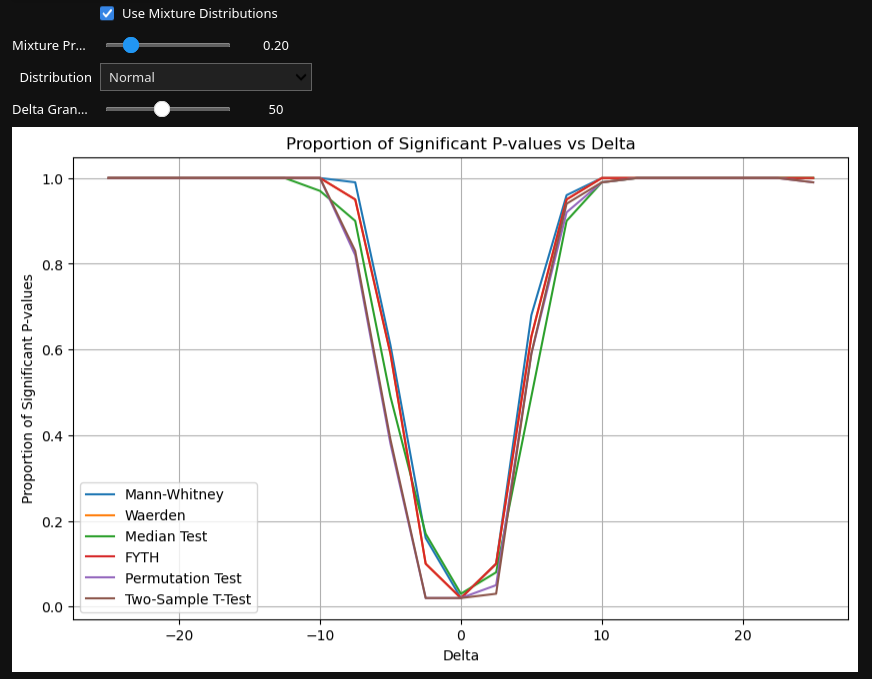

In [30]:
def plot_interactive_tests_trend1(
    mean1=0, delta=0, std_dev1=10, std_dev2=10, size=50, runs=100, signif_alpha=0.05,
    mw_test=True, waerden_test=True, median_t=True, fy_test=True, perm_test=True, t_test=True,
    mixture=False, mixture_thresh=0.1, distribution='Normal', d_gran=20
):

    # Set up mixture threshold values
    mixture_thresh_values = np.linspace(0.01, 1, num=21)

    # Initialize a dictionary to store proportions for each test
    test_proportions = {}
    if mw_test:
        test_proportions['Mann-Whitney'] = []
    if waerden_test:
        test_proportions['Waerden'] = []
    if median_t:
        test_proportions['Median Test'] = []
    if fy_test:
        test_proportions['FYTH'] = []
    if perm_test:
        test_proportions['Permutation Test'] = []
    if t_test:
        test_proportions['Two-Sample T-Test'] = []

    # Loop over mixture_thresh values
    for mixture_thresh in mixture_thresh_values:
        # Initialize p-value lists for this mixture threshold
        mw_p_values_d = []
        waerden_p_values_d = []
        median_test_p_values_d = []
        fy_p_values_d = []
        perm_p_values_d = []
        tstt_p_values_d = []

        mean2_d = mean1 + delta

        for _ in range(runs):
            if mixture:
                # Generate samples from mixture distributions
                mixture_size = int(size * mixture_thresh)
                size1 = size - mixture_size
                outlier_sample = generate_samples('Cauchy', mean1 + 3 * std_dev1, std_dev1 * 0.01, mixture_size)

                sample1 = np.concatenate([
                    generate_samples(distribution, mean1, std_dev1, size1),
                    outlier_sample
                ])
                sample2 = np.concatenate([
                    generate_samples(distribution, mean2_d, std_dev2, size1),
                    outlier_sample
                ])
            else:
                sample1 = generate_samples(distribution, mean1, std_dev1, size)
                sample2 = generate_samples(distribution, mean2_d, std_dev2, size)

            # Perform statistical tests
            if mw_test:
                stat_mw, p_value_mw = mannwhitneyu(sample1, sample2, alternative='two-sided')
                mw_p_values_d.append(p_value_mw)

            if waerden_test:
                _, p_value_waerden = van_der_waerden_test(sample1, sample2)
                waerden_p_values_d.append(p_value_waerden)

            if median_t:
                _, median_p_value, _, _ = median_test(sample1, sample2)
                median_test_p_values_d.append(median_p_value)

            if fy_test:
                _, fy_p_value = fisher_yates_terry_hoeffding_test(sample1, sample2)
                fy_p_values_d.append(fy_p_value)

            if perm_test:
                _, perm_p_value = permutation_test(sample1, sample2, num_permutations=1000)
                perm_p_values_d.append(perm_p_value)

            if t_test:
                _, tstt_p_value = ttest_ind(sample1, sample2, equal_var=std_dev1 == std_dev2)
                tstt_p_values_d.append(tstt_p_value)

        # Compute proportions for this mixture_thresh
        if mw_test:
            prop_mw = len([i for i in mw_p_values_d if i < signif_alpha]) / len(mw_p_values_d)
            test_proportions['Mann-Whitney'].append(prop_mw)
        if waerden_test:
            prop_waerden = len([i for i in waerden_p_values_d if i < signif_alpha]) / len(waerden_p_values_d)
            test_proportions['Waerden'].append(prop_waerden)
        if median_t:
            prop_median = len([i for i in median_test_p_values_d if i < signif_alpha]) / len(median_test_p_values_d)
            test_proportions['Median Test'].append(prop_median)
        if fy_test:
            prop_fyth = len([i for i in fy_p_values_d if i < signif_alpha]) / len(fy_p_values_d)
            test_proportions['FYTH'].append(prop_fyth)
        if perm_test:
            prop_perm = len([i for i in perm_p_values_d if i < signif_alpha]) / len(perm_p_values_d)
            test_proportions['Permutation Test'].append(prop_perm)
        if t_test:
            prop_ttest = len([i for i in tstt_p_values_d if i < signif_alpha]) / len(tstt_p_values_d)
            test_proportions['Two-Sample T-Test'].append(prop_ttest)

    # Plot mixture_thresh values vs proportions
    plt.figure(figsize=(10, 6))
    for test_name, proportions in test_proportions.items():
        plt.plot(mixture_thresh_values, proportions, label=test_name)

    plt.xlabel('Mixture Threshold')
    plt.ylabel('Proportion of Significant P-values')
    plt.title('Proportion of Significant P-values vs Mixture Threshold')
    plt.legend()
    plt.grid(True)
    plt.show()

interact(
    plot_interactive_tests_trend1,
    mean1=widgets.FloatSlider(value=0, min=-50, max=50, step=1, description='Mean 1'),
    delta=widgets.FloatSlider(value=0, min=-50, max=50, step=1, description='Delta'),
    std_dev1=widgets.FloatSlider(value=10, min=1, max=30, step=1, description='Std Dev 1'),
    std_dev2=widgets.FloatSlider(value=10, min=1, max=30, step=1, description='Std Dev 2'),
    size=widgets.IntSlider(value=50, min=10, max=500, step=10, description='Sample Size'),
    runs=widgets.IntSlider(value=50, min=2, max=500, step=2, description='Runs'),
    signif_alpha=widgets.Dropdown(options=[0.05, 0.01, 0.005, 0.001], value=0.05, description='Alpha'),
    mw_test=widgets.ToggleButton(value=True, description='Mann-Whitney'),
    waerden_test=widgets.ToggleButton(value=True, description='Waerden'),
    median_t=widgets.ToggleButton(value=True, description='Median Test'),
    fy_test=widgets.ToggleButton(value=True, description='FYTH'),
    perm_test=widgets.ToggleButton(value=True, description='Permutation Test'),
    t_test=widgets.ToggleButton(value=True, description='Two-Sample T-Test'),
    mixture=widgets.Checkbox(value=False, description='Use Mixture Distributions'),
    mixture_thresh=widgets.FloatSlider(value=0.1, min=0, max=1, step=0.05, description='Mixture Proportion'),
    d_gran=widgets.IntSlider(value=20, min=10, max=100, step=5, description='Delta Granularity'),
    distribution=distribution_widget
)


interactive(children=(FloatSlider(value=0.0, description='Mean 1', max=50.0, min=-50.0, step=1.0), FloatSlider…

<function __main__.plot_interactive_tests_trend1(mean1=0, delta=0, std_dev1=10, std_dev2=10, size=50, runs=100, signif_alpha=0.05, mw_test=True, waerden_test=True, median_t=True, fy_test=True, perm_test=True, t_test=True, mixture=False, mixture_thresh=0.1, distribution='Normal', d_gran=20)>

### book page 970

# Poisson distribution

In [43]:
def plot_interactive_tests(mean1=0, mean2=0, size=100):
    np.random.seed(42)

    mean1 = 10 ** mean1
    mean2 = 10 ** mean2
    
    sample1 = np.random.poisson(lam=mean1, size=size)
    sample2 = np.random.poisson(lam=mean2, size=size)

    stat_mw, p_value_mw = mannwhitneyu(sample1, sample2, alternative='two-sided')
    
    combined = np.concatenate([sample1, sample2])
    ranks = rankdata(combined)
    normal_scores = norm.ppf(ranks / (len(combined) + 1))

    scores1, scores2 = normal_scores[:size], normal_scores[size:]
    mean_diff = np.abs(np.mean(scores1) - np.mean(scores2))
    pooled_std = np.sqrt(np.var(scores1, ddof=1) / size + np.var(scores2, ddof=1) / size)
    stat_waerden = mean_diff / pooled_std
    p_value_waerden = 2 * (1 - norm.cdf(stat_waerden))


    plt.figure(figsize=(10, 6))
    plt.hist(sample1, bins='auto', alpha=0.7, label=f'Sample 1 (Mean={mean1:.3f})', color='blue', edgecolor='black')
    plt.hist(sample2, bins='auto', alpha=0.7, label=f'Sample 2 (Mean={mean2:.3f})', color='orange', edgecolor='black')
    plt.axvline(np.mean(sample1), color='blue', linestyle='dashed', linewidth=1)
    plt.axvline(np.mean(sample2), color='orange', linestyle='dashed', linewidth=1)
    plt.title("Histogram of Sample 1 and Sample 2")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()
    
    plt.figtext(0.15, 0.75, f"Wilcoxon Mann-Whitney Test\nStatistic: {stat_mw:.2f}\nP-value: {p_value_mw:.4f}", 
                fontsize=10, color="black", bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.5"))
    plt.figtext(0.15, 0.65, f"Van der Waerden Test\nStatistic: {stat_waerden:.2f}\nP-value: {p_value_waerden:.4f}", 
                fontsize=10, color="black", bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.5"))
    plt.show()

interact(plot_interactive_tests, 
         mean1=widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='Mean 1'),
         mean2=widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='Mean 2'),
         size=widgets.IntSlider(value=300, min=100, max=500, step=50, description='Sample Size')
         )


interactive(children=(FloatSlider(value=0.0, description='Mean 1', max=10.0, min=-10.0), FloatSlider(value=0.0…

<function __main__.plot_interactive_tests(mean1=0, mean2=0, size=100)>